<a href="https://colab.research.google.com/github/vinodvicki/Weather_prediction-/blob/main/Rain_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# predecting the rain fall
# importing nessary libries
!pip install catboost

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,classification_report,f1_score,precision_score,recall_score

from imblearn.over_sampling import SMOTE
from scipy.stats import stats



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.8 MB/s eta 0:00:00


In [3]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets /Machine Learning Project 32 - Rain Fall Prediction/weatherAUS.csv")

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Your dataset contains weather-related features for rainfall prediction. It includes columns like:

* Date: The date of the observation.
* Location: The location of the weather observation.
* MinTemp and MaxTemp: Minimum and maximum temperatures of the day.
* Rainfall: Amount of rainfall in mm.
* WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am,   
* WindSpeed3pm: Wind-related metrics.
* Humidity9am and Humidity3pm: Humidity percentages at 9 AM and 3 PM.
* Pressure9am and Pressure3pm: Atmospheric pressure at 9 AM and 3 PM.
* Cloud9am and Cloud3pm: Cloud cover at 9 AM and 3 PM.
* Temp9am and Temp3pm: Temperatures at 9 AM and 3 PM.
* RainToday and RainTomorrow: Indicating if it rained today or if it will rain tomorrow.

In [6]:
#shuffel the data in random
df=df.sample(frac=1).reset_index(drop=True)

In [7]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2016-08-01,AliceSprings,5.7,22.0,0.0,NaN,NaN,SSW,46.0,SW,...,43.0,27.0,1018.7,1016.0,NaN,NaN,16.8,20.8,No,No
1,2014-10-29,Walpole,13.8,19.7,0.0,NaN,NaN,S,28.0,SSE,...,75.0,70.0,1017.0,1015.0,NaN,NaN,16.3,17.7,No,No
2,2013-04-17,Mildura,6.6,23.1,0.0,3.8,9.4,SW,31.0,SE,...,54.0,27.0,1018.6,1015.7,7.0,1.0,12.0,22.8,No,No
3,2012-01-24,WaggaWagga,16.4,31.2,0.0,11.2,11.2,E,48.0,E,...,45.0,26.0,1016.8,1012.6,7.0,7.0,21.4,29.7,No,No
4,2015-12-04,MelbourneAirport,8.6,32.1,0.0,5.4,12.1,ESE,50.0,ENE,...,66.0,20.0,1024.5,1019.8,1.0,1.0,17.2,31.2,No,No


# Data preprocessing

In [8]:
# missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(df)) * 100

missing_display = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage}).sort_values(by='Percentage', ascending=False )

print(missing_display)

               Missing Values  Percentage
Sunshine                69835   48.009762
Evaporation             62790   43.166506
Cloud3pm                59358   40.807095
Cloud9am                55888   38.421559
Pressure9am             15065   10.356799
Pressure3pm             15028   10.331363
WindDir9am              10566    7.263853
WindGustDir             10326    7.098859
WindGustSpeed           10263    7.055548
Humidity3pm              4507    3.098446
WindDir3pm               4228    2.906641
Temp3pm                  3609    2.481094
RainTomorrow             3267    2.245978
Rainfall                 3261    2.241853
RainToday                3261    2.241853
WindSpeed3pm             3062    2.105046
Humidity9am              2654    1.824557
Temp9am                  1767    1.214767
WindSpeed9am             1767    1.214767
MinTemp                  1485    1.020899
MaxTemp                  1261    0.866905
Location                    0    0.000000
Date                        0    0

* dropping columns with more than 40% missing data might lose valuable information. Instead, we can take alternative approaches to handle such columns while retaining their information

Alternative Strategies for Handling Columns with High Missing Values
Impute with Advanced Techniques

* Use statistical models or machine learning algorithms (e.g., KNN Imputation) to predict missing values based on other correlated features.
For numerical columns (e.g., Sunshine, Evaporation), impute using grouped statistics like the median or mean for similar weather conditions (e.g., grouped by Location or Month)

Treat Missing Data as a Separate Category

* For categorical features, encode missing values as a new category (Unknown).
For numerical columns, create a binary indicator column to flag missing values and impute the missing ones with the median or mean.

Use Domain Knowledge

* For features like Cloud3pm, where values may be correlated with other cloud-related features or time-based trends, estimate values using related features or models.

Use Predictive Imputation

* Train a regression or classification model to predict missing values using the available data

Cluster-Based Imputation

* Cluster data into similar groups (e.g., using K-means) and impute missing values within each cluster based on group-specific statistics.

Retain Columns but Limit Their Influence

* Standardize features with high missing data to reduce their variability and impact during modeling.

In [9]:
## Retaining columns with high missing values and handling them differently
from sklearn.impute import KNNImputer

# 1. Handle Missing Values:
# Identify numerical and categorical columns with missing values
numericial_columns = df.select_dtypes(include= np.number).columns
categorical_columns = df.select_dtypes(exclude = np.number).columns

In [10]:
# Using grouped median imputation for numerical columns based on 'Location' and 'Month
df['Date'] = pd.to_datetime(df['Date'])
df["day"] = df["Date"].dt.day
df["year"] = df["Date"].dt.year
df['Month'] = df['Date'].dt.month
for col in numericial_columns:
    df[col] = df.groupby(['Location', 'Month'])[col].transform(lambda x: x.fillna(x.median()))# his part applies a function (lambda x: x.fillna(x.median()))
    #to each group. This function replaces missing values (NaN) in the selected column (col) with the median value of that column within the same group.

# impute missing numerical data with KNNimputer
imputer = KNNImputer(n_neighbors=5)
df[numericial_columns] = imputer.fit_transform(df[numericial_columns])


#impute missing Catagorical data with unknown
#for column in categorical_columns:
 #   df[column].fillna('Unknown', inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

In [12]:
df[['WindGustDir','WindDir9am','WindDir3pm','Location']].apply(pd.unique)
# Get unique values for multiple columns using a loop:
for col in ['WindGustDir','WindDir9am','WindDir3pm','Location']:
    print(df[col].unique())

# deleting Unknown in columns
for col in ['WindGustDir','WindDir9am','WindDir3pm','Location']:
    df = df[df[col] != 'Unknown']

['SSW' 'S' 'SW' 'E' 'ESE' 'NNW' 'NW' 'N' 'WNW' 'NNE' 'WSW' 'NE' 'W' nan
 'SSE' 'SE' 'ENE']
['SW' 'SSE' 'SE' 'E' 'ENE' 'N' 'W' 'WSW' 'S' 'WNW' 'NNW' 'NW' 'NNE' 'NE'
 nan 'ESE' 'SSW']
['SSW' 'SSE' 'WSW' 'SE' 'NNW' 'ESE' 'NW' 'NE' 'SW' 'WNW' 'NNE' 'E' 'W' nan
 'S' 'N' 'ENE']
['AliceSprings' 'Walpole' 'Mildura' 'WaggaWagga' 'MelbourneAirport'
 'Ballarat' 'PerthAirport' 'Tuggeranong' 'Brisbane' 'PearceRAAF'
 'Nuriootpa' 'Launceston' 'Dartmoor' 'Darwin' 'Wollongong' 'Witchcliffe'
 'Uluru' 'NorahHead' 'Cairns' 'Watsonia' 'Newcastle' 'SydneyAirport'
 'MountGambier' 'Perth' 'Albury' 'CoffsHarbour' 'Woomera' 'Sydney'
 'Hobart' 'Canberra' 'SalmonGums' 'Albany' 'Melbourne' 'Bendigo'
 'Townsville' 'Richmond' 'Cobar' 'Moree' 'Portland' 'Katherine'
 'GoldCoast' 'BadgerysCreek' 'Penrith' 'Sale' 'Adelaide' 'NorfolkIsland'
 'MountGinini' 'Williamtown' 'Nhil']


In [13]:
# ecncoding catagorical features for ordinal  and nominal accordingly.
df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})
#label_encoder = LabelEncoder()
#df['RainToday'] = label_encoder.fit_transform(df['RainToday'])
#df['RainTomorrow'] = label_encoder.fit_transform(df['RainTomorrow'])

for feature in categorical_columns:
    print(feature, (df.groupby([feature])["RainTomorrow"].mean().sort_values(ascending = False)).index)

#ecncoding catagorical features for nominal data
df = pd.get_dummies(df, columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], drop_first=True)

Date DatetimeIndex(['2007-11-01', '2007-12-27', '2007-12-01', '2008-04-13',
               '2007-12-03', '2008-03-25', '2008-03-07', '2007-12-07',
               '2008-02-28', '2008-02-12',
               ...
               '2007-12-26', '2011-10-11', '2008-04-30', '2007-12-25',
               '2008-05-01', '2008-05-02', '2008-05-03', '2008-05-04',
               '2008-05-05', '2008-05-24'],
              dtype='datetime64[ns]', name='Date', length=3436, freq=None)
Location Index(['Portland', 'Walpole', 'Cairns', 'Dartmoor', 'NorfolkIsland',
       'MountGambier', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'MountGinini',
       'NorahHead', 'Williamtown', 'Darwin', 'Melbourne', 'GoldCoast',
       'Sydney', 'Ballarat', 'SydneyAirport', 'Newcastle', 'Watsonia',
       'Wollongong', 'Hobart', 'Launceston', 'Brisbane', 'Adelaide',
       'MelbourneAirport', 'Sale', 'Albury', 'Perth', 'Penrith',
       'BadgerysCreek', 'Nuriootpa', 'Richmond', 'Tuggeranong', 'PerthAirport',
       'Bendigo',

In [14]:

df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])
df.isnull().sum().sort_values(ascending=False)

,0
Date,0
WindDir9am_ESE,0
WindGustDir_WSW,0
WindGustDir_WNW,0
WindGustDir_W,0
...,...
Location_Darwin,0
Location_Dartmoor,0
Location_CoffsHarbour,0
Location_Cobar,0


In [15]:
df.head(5)

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2016-08-01,5.7,22.0,0.0,5.80,10.90,46.0,24.0,24.0,43.0,...,False,False,False,False,False,True,False,False,False,False
1,2014-10-29,13.8,19.7,0.0,4.52,6.48,28.0,9.0,15.0,75.0,...,False,False,False,False,True,False,False,False,False,False
2,2013-04-17,6.6,23.1,0.0,3.80,9.40,31.0,9.0,11.0,54.0,...,False,False,False,False,False,False,False,False,False,True
3,2012-01-24,16.4,31.2,0.0,11.20,11.20,48.0,24.0,11.0,45.0,...,False,False,False,False,True,False,False,False,False,False
4,2015-12-04,8.6,32.1,0.0,5.40,12.10,50.0,7.0,19.0,66.0,...,False,False,False,True,False,False,False,False,False,False


In [16]:
# applying Lablencoder to converting all bool columns

label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'bool':
        df[column] = label_encoder.fit_transform(df[column])

In [17]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2016-08-01,5.7,22.0,0.0,5.80,10.90,46.0,24.0,24.0,43.0,...,0,0,0,0,0,1,0,0,0,0
1,2014-10-29,13.8,19.7,0.0,4.52,6.48,28.0,9.0,15.0,75.0,...,0,0,0,0,1,0,0,0,0,0
2,2013-04-17,6.6,23.1,0.0,3.80,9.40,31.0,9.0,11.0,54.0,...,0,0,0,0,0,0,0,0,0,1
3,2012-01-24,16.4,31.2,0.0,11.20,11.20,48.0,24.0,11.0,45.0,...,0,0,0,0,1,0,0,0,0,0
4,2015-12-04,8.6,32.1,0.0,5.40,12.10,50.0,7.0,19.0,66.0,...,0,0,0,1,0,0,0,0,0,0


In [18]:
pd.set_option("display.max_columns", None)
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,year,Month,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2016-08-01,5.7,22.0,0.0,5.80,10.90,46.0,24.0,24.0,43.0,27.0,1018.7,1016.0,0.0,0.0,16.8,20.8,0.0,0.0,1,2016,8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2014-10-29,13.8,19.7,0.0,4.52,6.48,28.0,9.0,15.0,75.0,70.0,1017.0,1015.0,6.0,6.5,16.3,17.7,0.0,0.0,29,2014,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2013-04-17,6.6,23.1,0.0,3.80,9.40,31.0,9.0,11.0,54.0,27.0,1018.6,1015.7,7.0,1.0,12.0,22.8,0.0,0.0,17,2013,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2012-01-24,16.4,31.2,0.0,11.20,11.20,48.0,24.0,11.0,45.0,26.0,1016.8,1012.6,7.0,7.0,21.4,29.7,0.0,0.0,24,2012,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,2015-12-04,8.6,32.1,0.0,5.40,12.10,50.0,7.0,19.0,66.0,20.0,1024.5,1019.8,1.0,1.0,17.2,31.2,0.0,0.0,4,2015,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [19]:
# Rename columns related to location
location_columns = [col for col in df.columns if 'Location_' in col]
for col in location_columns:
    new_col_name = col.replace('Location_', '')
    df.rename(columns={col: new_col_name}, inplace=True)
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,year,Month,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2016-08-01,5.7,22.0,0.0,5.80,10.90,46.0,24.0,24.0,43.0,27.0,1018.7,1016.0,0.0,0.0,16.8,20.8,0.0,0.0,1,2016,8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2014-10-29,13.8,19.7,0.0,4.52,6.48,28.0,9.0,15.0,75.0,70.0,1017.0,1015.0,6.0,6.5,16.3,17.7,0.0,0.0,29,2014,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2013-04-17,6.6,23.1,0.0,3.80,9.40,31.0,9.0,11.0,54.0,27.0,1018.6,1015.7,7.0,1.0,12.0,22.8,0.0,0.0,17,2013,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2012-01-24,16.4,31.2,0.0,11.20,11.20,48.0,24.0,11.0,45.0,26.0,1016.8,1012.6,7.0,7.0,21.4,29.7,0.0,0.0,24,2012,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,2015-12-04,8.6,32.1,0.0,5.40,12.10,50.0,7.0,19.0,66.0,20.0,1024.5,1019.8,1.0,1.0,17.2,31.2,0.0,0.0,4,2015,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [20]:
df.RainTomorrow.dtype

dtype('float64')

In [21]:
# converting RainToday and RainTomorrow into int
df['RainToday'] = df['RainToday'].astype(int)
df['RainTomorrow'] = df['RainTomorrow'].astype(int)

# data visualization

<Axes: xlabel='RainToday', ylabel='count'>

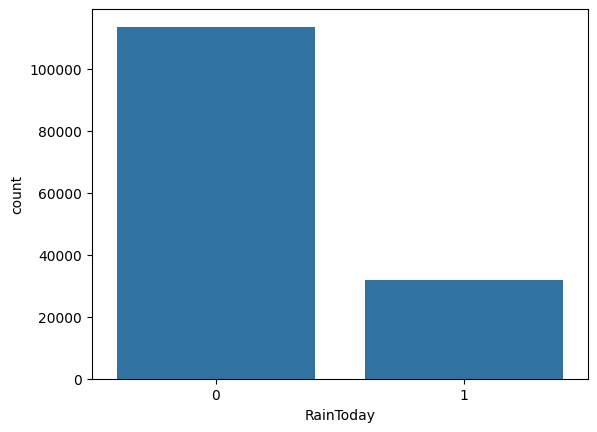

In [22]:
sns.countplot(x= df['RainToday'])

<Axes: xlabel='RainTomorrow', ylabel='count'>

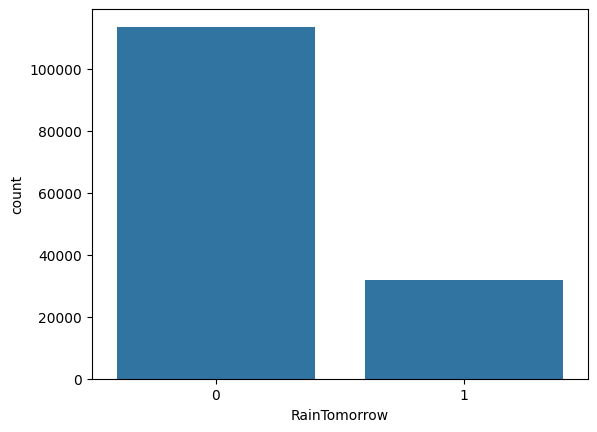

In [23]:
sns.countplot(x=df['RainTomorrow'])

In [24]:
outliers = df.columns[1:17]
outliers

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

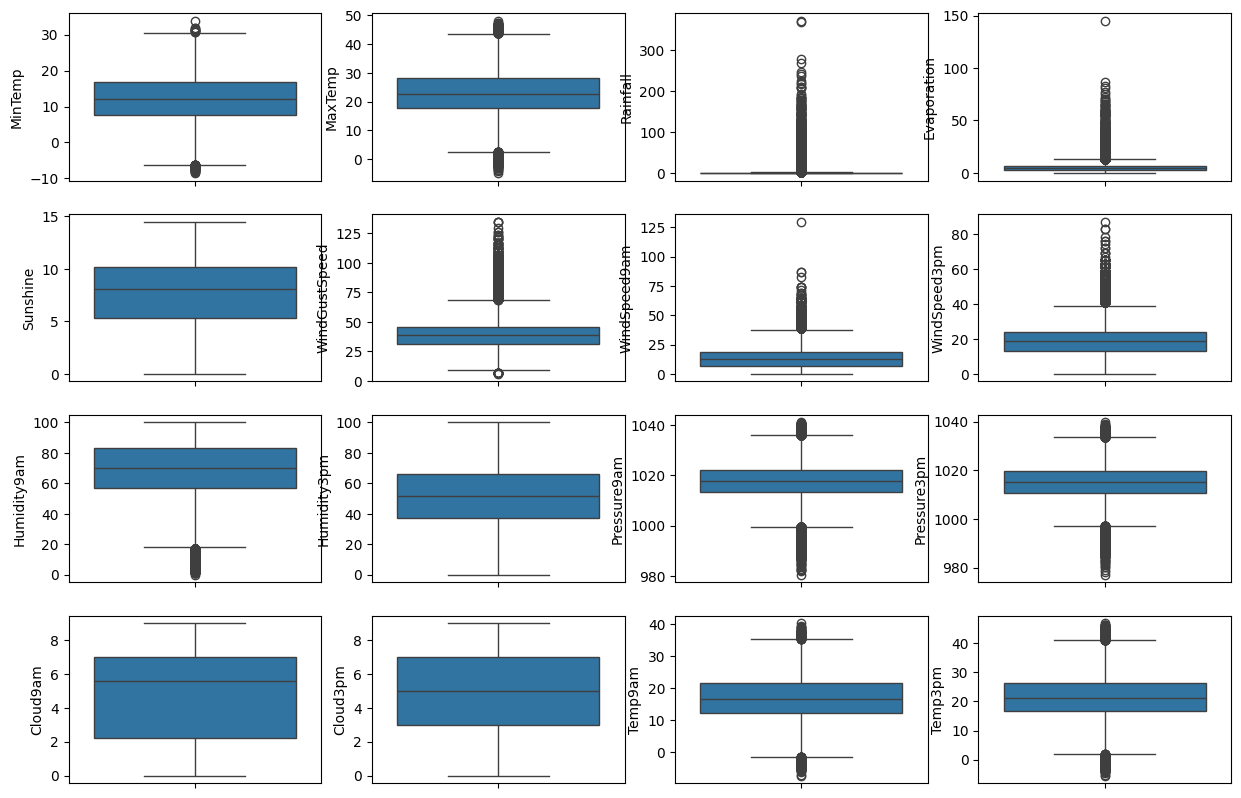

In [25]:
# ploting box plt to find outliers in MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
# 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm','Temp9am',
# 'Temp3pm'
plt.figure(figsize=(15, 10))
for i, col in enumerate(outliers, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(df[col])
plt.tight_layout
plt.show()

In [26]:
# prompt: i want to deal with outliers different kind of features

def treat_outliers(df, column_name, method='iqr', factor=1.5):
    """
    Treats outliers in a specified column of a Pandas DataFrame.

    Args:
        df: The input DataFrame.
        column_name: The name of the column to treat outliers.
        method: The method to use for outlier treatment ('iqr' or 'zscore').
        factor: The factor to use for IQR method (default is 1.5).

    Returns:
        A new DataFrame with outliers treated.
    """
    df_treated = df.copy()  # Create a copy to avoid modifying the original

    if method == 'iqr':
        Q1 = df_treated[column_name].quantile(0.25)
        Q3 = df_treated[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        df_treated[column_name] = np.clip(df_treated[column_name], lower_bound, upper_bound)
    elif method == 'zscore':
        z_scores = np.abs(stats.zscore(df_treated[column_name]))
        df_treated[column_name] = np.where(z_scores < 3, df_treated[column_name], np.nan) # Replace with NaN or use imputation method below
        # Imputation (Example: using median)
        df_treated[column_name].fillna(df_treated[column_name].median(), inplace=True)

    else:
        raise ValueError("Invalid outlier treatment method specified.")
    return df_treated


# Example usage (assuming 'df' is your DataFrame):
outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
            'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
            'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
            'Cloud3pm', 'Temp9am', 'Temp3pm']

for col in outliers:
    df = treat_outliers(df, col, method='iqr') # or method = 'zscore'

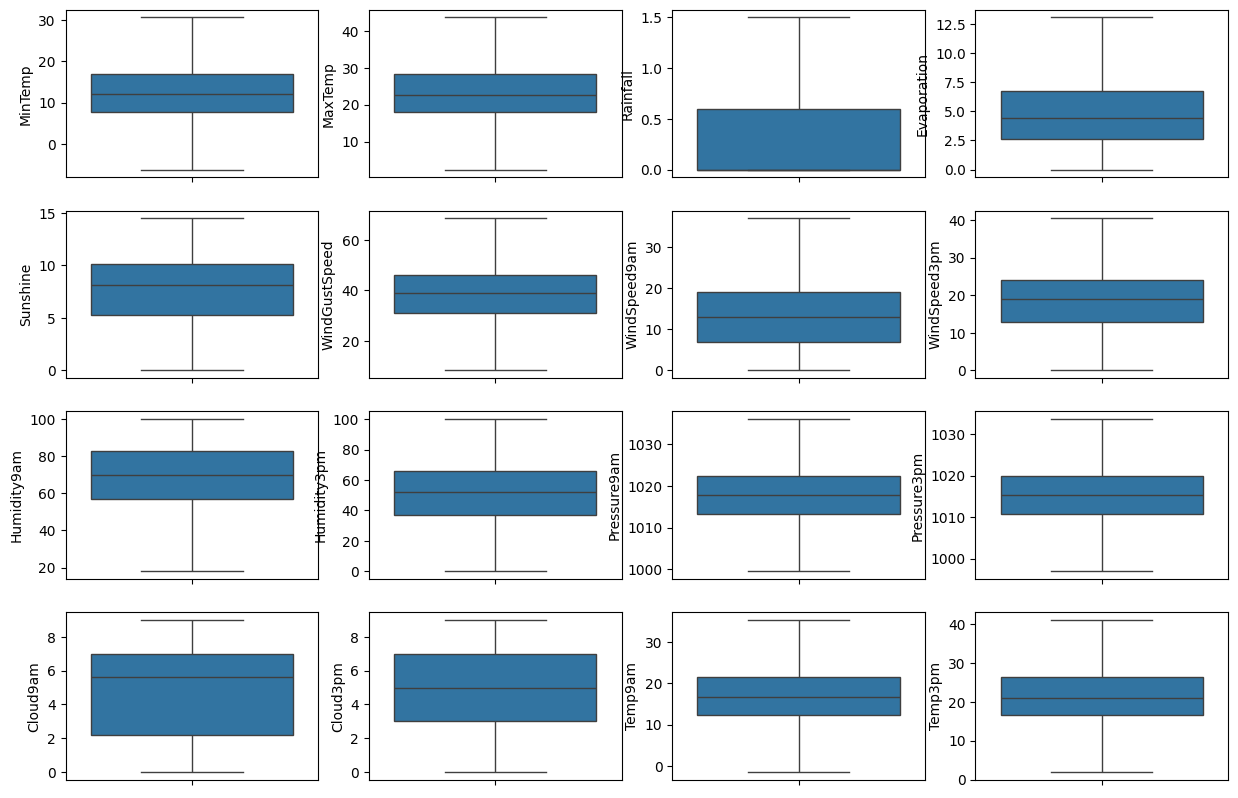

In [27]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(outliers, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(df[col])
plt.tight_layout
plt.show()

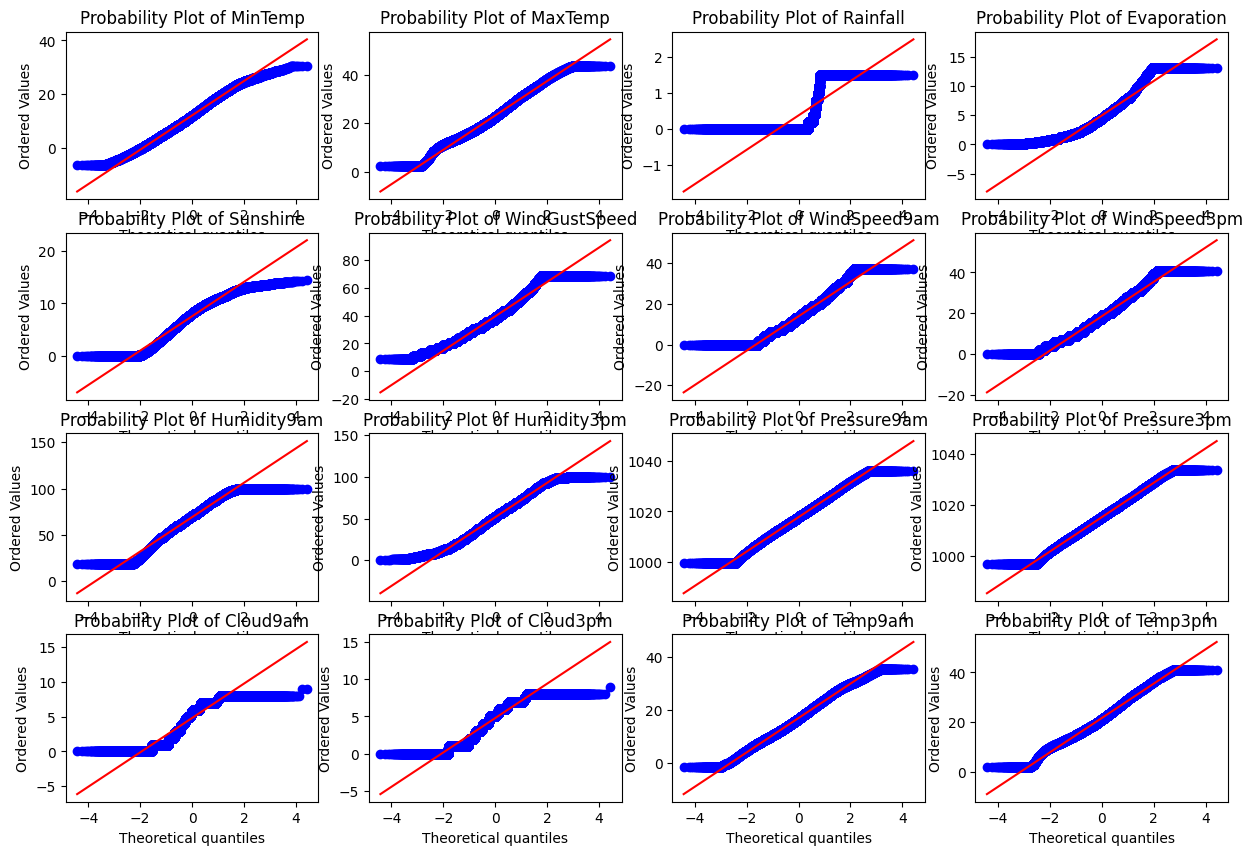

In [28]:
# ploting propablity plot for outliers
from scipy.stats import probplot
plt.figure(figsize=(15, 10))
for i, col in enumerate(outliers, 1):
    plt.subplot(4, 4, i)
    probplot(df[col], dist="norm", plot=plt)
    plt.title(f"Probability Plot of {col}")
plt.tight_layout
plt.show()

# model implementation


In [29]:
df.to_csv("preprocessed_data.csv", index=False)

In [34]:
# finding corelarion for top 10
corr_matrix = df.corr()
corr_matrix

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,year,Month,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
Date,1.000000,0.022929,0.044190,-0.016274,0.030241,0.039330,-0.023629,-0.009977,-0.029417,-0.003835,-0.012898,0.030670,0.024646,0.032483,0.016230,0.034245,0.042831,-0.013117,-0.013328,0.005501,0.993592,0.000257,-0.002195,-0.002195,-0.002195,0.000348,-0.002195,-0.002195,-0.015104,-0.002195,-0.036798,0.000348,0.000348,0.000348,-0.015104,-0.002195,-0.015104,0.085691,-0.002195,-0.015104,0.000348,0.000348,0.000348,-0.002195,-0.002195,-0.002276,0.085691,0.000278,0.000348,0.000348,0.000348,-0.002132,-0.015104,0.000348,0.000348,0.000348,0.000348,0.000787,-0.028416,0.000348,-0.002195,-0.002173,0.085691,0.000348,0.000445,0.000348,0.000348,0.000348,-0.002195,0.000348,0.007208,0.001020,-0.002227,0.003690,0.001166,0.003729,0.004817,-0.000158,0.003076,0.006320,0.015450,-0.002284,0.009631,-0.002203,0.003038,-0.002625,0.010385,0.001980,-0.000666,0.003456,-0.000990,0.005419,-0.000083,-0.000029,0.005437,0.006818,0.002549,-0.009176,-0.001566,0.002570,0.000676,0.000959,-0.000938,-0.004102,-0.002665,0.008022,-0.005007,0.002198,-0.015255,-0.000916,0.007429,0.001403,0.002094,-0.004594,-0.004673
MinTemp,0.022929,1.000000,0.737433,0.043687,0.578841,0.136482,0.182664,0.175898,0.175946,-0.237840,-0.002759,-0.441357,-0.453614,0.011202,-0.054381,0.902157,0.713195,0.054073,0.081638,0.002494,0.045574,-0.204441,0.017638,-0.061119,0.021658,-0.023607,-0.110468,-0.082435,0.099395,0.206433,-0.130614,0.021652,0.051153,-0.079442,0.258385,0.118293,-0.073175,0.137960,-0.099953,-0.007235,-0.050609,-0.033374,0.016241,-0.077164,-0.198105,0.035617,-0.052273,0.071570,0.106388,-0.064649,0.002531,0.009227,0.017018,0.008718,-0.059400,-0.018905,-0.082611,-0.066409,0.064162,0.061588,0.188079,-0.113381,0.036853,-0.058730,-0.009351,-0.046814,0.013265,-0.032251,0.062933,0.026528,0.090183,0.051426,-0.054892,0.086955,0.035304,-0.071932,-0.067275,0.008910,0.072564,0.028377,-0.010031,-0.051716,-0.084827,-0.056376,-0.073066,0.037163,0.053260,-0.026849,0.030697,0.020333,-0.042516,-0.041356,0.052209,0.083885,0.085917,0.017183,-0.020060,-0.050366,-0.049671,-0.042056,0.113578,0.066374,-0.040053,0.091304,0.026434,-0.069090,-0.063179,-0.007997,0.075986,0.024128,-0.036431,-0.045134,-0.077531,-0.047310,-0.059638
MaxTemp,0.044190,0.737433,1.000000,-0.264548,0.711555,0.517296,0.077273,0.015222,0.053095,-0.505231,-0.509984,-0.320035,-0.415058,-0.293584,-0.320344,0.887724,0.982734,-0.224354,-0.155905,0.000769,0.062180,-0.164407,-0.064973,-0.011944,0.124246,0.016987,-0.101606,-0.032965,0.068399,0.130692,-0.049012,0.054373,0.015398,-0.070031,0.197023,0.052643,-0.113117,0.173490,-0.087986,-0.050481,-0.055900,0.033159,0.076481,-0.069850,-0.233824,0.018564,-0.011773,-0.013048,-0.028436,-0.0

In [36]:
# train , validation and test set
X = df.drop(['RainTomorrow','Date'], axis=1)
y = df['RainTomorrow']

In [37]:
# scaling the features
Scalar = StandardScaler()
X = Scalar.fit_transform(X)

In [41]:
# checking Class imblance in data
y.value_counts()

,count
RainTomorrow,
0,113583
1,31877


In [42]:
#Handle Class Imbalance (if needed):
# Check class distribution and apply SMOTE if imbalanced
smote  = SMOTE(random_state=42)
X,y= smote.fit_resample(X,y)

# print no of classes before and after fit
print ("Before fit", y.value_counts())
print ("After fit", pd.Series(y).value_counts())

Before fit RainTomorrow
0    113583
1    113583
Name: count, dtype: int64
After fit RainTomorrow
0    113583
1    113583
Name: count, dtype: int64


In [43]:
# train , validation and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# implementation of modele
log_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
catboost = CatBoostClassifier()
xgboost = XGBClassifier()
lightgbm = LGBMClassifier()

In [48]:
log_regression.fit(X_train, y_train)
y_pred = log_regression.predict(X_test)

In [50]:
# Evaluate the Model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80     22664
           1       0.80      0.79      0.80     22770

    accuracy                           0.80     45434
   macro avg       0.80      0.80      0.80     45434
weighted avg       0.80      0.80      0.80     45434

Accuracy: 0.7968921952722631
F1 Score: 0.7962014134275618
Precision: 0.8007996446023989
Recall: 0.7916556873078612


In [51]:
print(confusion_matrix(y_test,y_pred))

[[18180  4484]
 [ 4744 18026]]


In [52]:
#implementing randomforest classifier
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

In [53]:
#evulating the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     22664
           1       0.90      0.90      0.90     22770

    accuracy                           0.90     45434
   macro avg       0.90      0.90      0.90     45434
weighted avg       0.90      0.90      0.90     45434

Accuracy: 0.8985781573271119
F1 Score: 0.8990447813513277
Precision: 0.8970009617906793
Recall: 0.9010979358805445
[[20308  2356]
 [ 2252 20518]]


In [54]:
# implementing Catboost
catboost = CatBoostClassifier(iterations=2000, eval_metric = "AUC")
catboost.fit(X_train, y_train)

Learning rate set to 0.050311
0:	total: 261ms	remaining: 8m 41s
1:	total: 484ms	remaining: 8m 3s
2:	total: 621ms	remaining: 6m 53s
3:	total: 776ms	remaining: 6m 27s
4:	total: 974ms	remaining: 6m 28s
5:	total: 1.22s	remaining: 6m 44s
6:	total: 1.43s	remaining: 6m 48s
7:	total: 1.64s	remaining: 6m 48s
8:	total: 1.97s	remaining: 7m 16s
9:	total: 2.25s	remaining: 7m 28s
10:	total: 2.52s	remaining: 7m 36s
11:	total: 2.78s	remaining: 7m 41s
12:	total: 3.05s	remaining: 7m 46s
13:	total: 3.33s	remaining: 7m 52s
14:	total: 3.65s	remaining: 8m 2s
15:	total: 3.94s	remaining: 8m 9s
16:	total: 4.18s	remaining: 8m 8s
17:	total: 4.44s	remaining: 8m 8s
18:	total: 4.69s	remaining: 8m 9s
19:	total: 4.92s	remaining: 8m 7s
20:	total: 5.14s	remaining: 8m 4s
21:	total: 5.35s	remaining: 8m 1s
22:	total: 5.62s	remaining: 8m 2s
23:	total: 5.86s	remaining: 8m 2s
24:	total: 6.15s	remaining: 8m 6s
25:	total: 6.48s	remaining: 8m 12s
26:	total: 6.74s	remaining: 8m 12s
27:	total: 7.02s	remaining: 8m 14s
28:	total: 7

In [55]:
y_pred = catboost.predict(X_test)

In [56]:
#evulating the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.91     22664
           1       0.94      0.88      0.91     22770

    accuracy                           0.91     45434
   macro avg       0.91      0.91      0.91     45434
weighted avg       0.91      0.91      0.91     45434

Accuracy: 0.9120262358586081
F1 Score: 0.9091115810537327
Precision: 0.9426132880652615
Recall: 0.8779095300834431


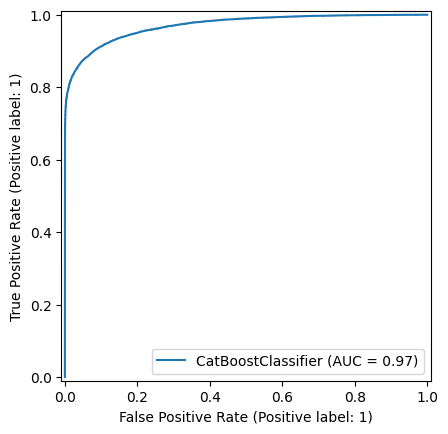

0.9121060181303203

In [58]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay # Import RocCurveDisplay

# Instead of metrics.plot_roc_curve, use:
RocCurveDisplay.from_estimator(catboost, X_test, y_test)

plt.show() # Add plt.show() to display the plot
metrics.roc_auc_score(y_test, y_pred, average=None)

Detailed summary of project

This project focuses on predicting rainfall in Australia using a machine learning approach.  The project utilizes a dataset containing various weather-related features, including temperature, wind speed and direction, humidity, pressure, cloud cover, and rainfall measurements. The goal is to build a model that accurately predicts whether it will rain tomorrow based on these historical weather observations.


Here's a breakdown of the project's key steps:


1. **Data Loading and Exploration:** The project begins by loading the weatherAUS.csv dataset. Initial exploration involves examining the dataset's structure, columns, and identifying potential issues like missing values.


2. **Data Preprocessing:** This crucial step addresses data quality issues.  The code handles missing values using a combination of imputation techniques.  Numerical features are imputed with the median values grouped by Location and month, while KNN imputation is used for other numerical columns. Categorical features with missing data are imputed with a new 'unknown' value. Specific categorical features such as wind direction and location, are carefully handled to filter out missing values or treat them as unknown to avoid errors during one-hot encoding.


3. **Feature Engineering:** A new feature engineering was done by extracting the day, year and month from the 'Date' column. The project transforms categorical features using one-hot encoding. It also converts boolean columns to numerical representations using Label Encoding. Location columns are renamed to simplify their use.  The data types of the target variables ('RainToday', 'RainTomorrow') are converted to integers.


4. **Outlier Detection and Treatment:** Outlier detection is performed using box plots and probability plots on several numerical attributes. Outliers are treated using the Interquartile Range (IQR) method,  replacing extreme values with the upper or lower bound calculated using the IQR. Alternatively, Z-score method can be used to remove outliers


5. **Data Visualization:**  Count plots visualize the distribution of 'RainToday' and 'RainTomorrow' to understand the class balance. Box plots and probability plots further examine the distribution of numerical features.


6. **Model Training and Evaluation:** Several classification models are trained: Logistic Regression, Decision Tree, Random Forest, CatBoost, XGBoost, and LightGBM.  The data is first scaled using StandardScaler. Then it is split into training and testing sets. To deal with the class imbalance problem SMOTE is used before fitting models.  The models' performance is evaluated using metrics like accuracy, F1-score, precision, recall, confusion matrix and AUC curve. The CatBoost model is evaluated through ROC AUC score.

7. **Further analysis**: The code displays the correlation matrix to find the correlation between the different features.


**Summary of Improvements**:

* **Missing Value Handling**: A more robust approach to missing value imputation is implemented considering the context and specific columns. Grouped median imputation for numerical variables offers more meaningful estimations compared to simple global medians or means.
* **Outlier Treatment**: Explicitly addresses outliers using the IQR method (and offers Z-score method).
* **Class Imbalance**: Addresses potential class imbalance by implementing SMOTE.
* **Comprehensive Evaluation**: Uses a variety of performance metrics to provide a holistic evaluation of the models.
* **Feature Engineering:** Explicitly engineered the day, year and month which were previously missing
* **Clearer Code Structure:**  Improved readability and maintainability by commenting the code extensively.


This project demonstrates a systematic approach to machine learning for rainfall prediction, starting with comprehensive data preprocessing and visualization and moving through various models to determine which yields the most accurate results.  The results of the chosen classification models are presented using metrics and plots to assist in comparing the models' effectiveness.

